In [14]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
import talib as ta


In [15]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date,
                      end = end_date,
                      progress = False)

data["Date"] = data.index
data = data[["Date", "Open", "High", "Low","Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace = True)
print(data.head)

<bound method NDFrame.head of           Date        Open        High         Low       Close   Adj Close  \
0   2021-11-01  148.164993  148.399506  143.579498  143.774002  143.774002   
1   2021-11-02  144.809402  146.920502  144.641006  145.863007  145.863007   
2   2021-11-03  146.274994  146.910507  145.053497  146.789993  146.789993   
3   2021-11-04  147.199997  149.949997  146.634995  148.682999  148.682999   
4   2021-11-05  149.353500  150.570755  148.651993  149.240997  149.240997   
..         ...         ...         ...         ...         ...         ...   
246 2022-10-24  102.089996  103.099998  100.300003  102.970001  102.970001   
247 2022-10-25  103.300003  105.099998  103.019997  104.930000  104.930000   
248 2022-10-26   96.760002   98.540001   94.570000   94.820000   94.820000   
249 2022-10-27   94.309998   95.169998   91.900002   92.599998   92.599998   
250 2022-10-28   92.529999   96.860001   92.322998   96.580002   96.580002   

       Volume  
0    32272000  
1

In [16]:
px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Rangeslider')


In [17]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

<BarContainer object of 251 artists>

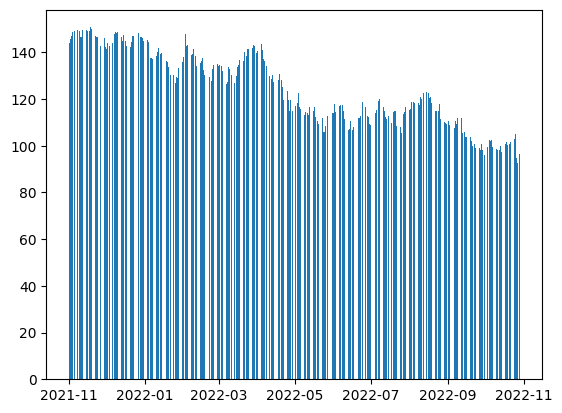

In [18]:
plt.bar(x=data["Date"], height=data["Close"]
)

In [28]:
meta = yf.Ticker("META")
df = meta.history(start=start_date)
df
# meta.actions

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-01 00:00:00-04:00,326.040009,333.450012,326.000000,329.980011,31518900,0,0
2021-11-02 00:00:00-04:00,331.380005,334.790009,323.799988,328.079987,28353000,0,0
2021-11-03 00:00:00-04:00,327.489990,332.149994,323.200012,331.619995,20786500,0,0
2021-11-04 00:00:00-04:00,334.010010,337.269989,332.649994,335.850006,22495300,0,0
2021-11-05 00:00:00-04:00,340.309998,346.790009,339.640015,341.130005,26872800,0,0
...,...,...,...,...,...,...,...
2022-10-25 00:00:00-04:00,130.880005,138.350006,130.589996,137.509995,38433200,0,0
2022-10-26 00:00:00-04:00,131.679993,135.550003,128.529999,129.820007,82791500,0,0
2022-10-27 00:00:00-04:00,97.980003,102.500000,96.379997,97.940002,232316600,0,0


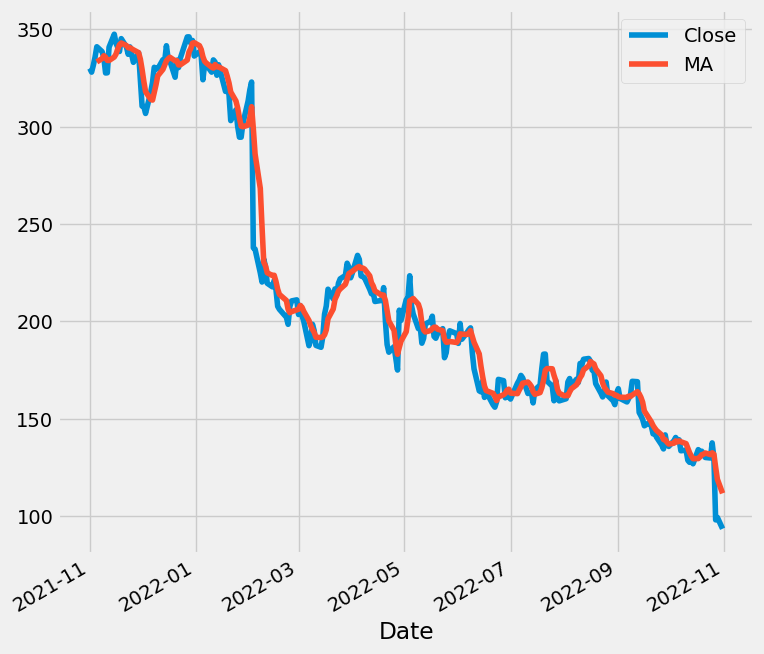

In [31]:
plt.style.use('fivethirtyeight')
df['MA'] = ta.SMA(df['Close'],timeperiod=5)
df[['Close','MA']].plot(figsize=(8,8))
plt.show()

<AxesSubplot: xlabel='Date'>

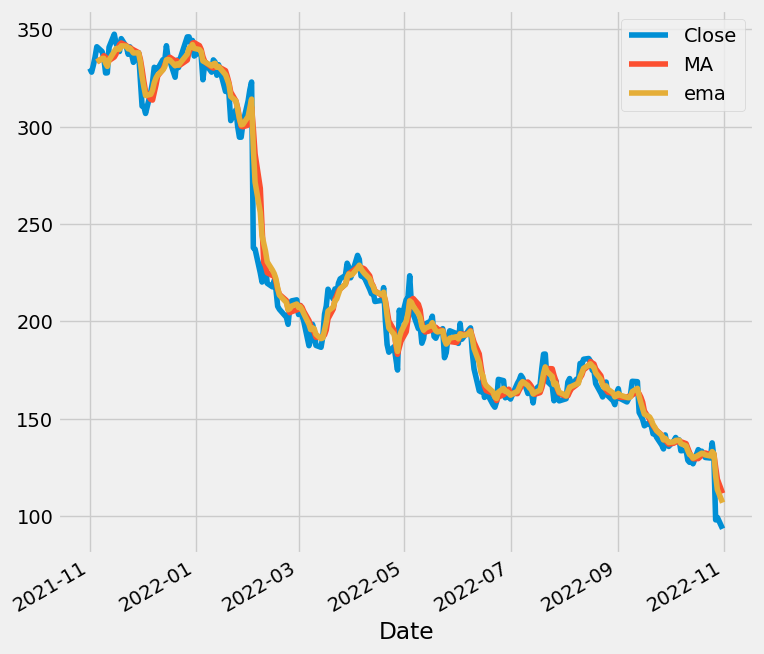

In [32]:
plt.style.use('fivethirtyeight')
df['ema'] = ta.EMA(df['Close'],timeperiod=5)
df[['Close','MA','ema']].plot(figsize=(8,8))

What is Relative Strength Index(RSI)
RSI is a momentum indicator that helps to learn whether a certain share is overbought or oversold. Its value lies between 0-100. If it is under 30, it means it is oversold and has a chance to buy it. If the value lies above 70, it means it is overbought and it is a good chance to dump your stock. Let’s calculate and chart the RSI of the FB/Meta stock. Let’s check the RSI of FB.

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,ema,RSI
Date,,,,,,,,,,
2022-10-18 00:00:00-04:00,137.089996,137.839996,131.399994,132.800003,25445000,0,0,130.277998,131.677143,41.226102
2022-10-19 00:00:00-04:00,132.889999,137.000000,132.220001,133.229996,30691000,0,0,131.423997,132.194760,41.833900
2022-10-20 00:00:00-04:00,132.929993,136.770004,131.309998,131.529999,26356300,0,0,131.671999,131.973173,40.069644
2022-10-21 00:00:00-04:00,126.309998,130.119995,125.440002,130.009995,46195500,0,0,132.321997,131.318780,38.505983
2022-10-24 00:00:00-04:00,127.250000,133.479996,124.570000,129.720001,63563400,0,0,131.457999,130.785854,38.199705
2022-10-25 00:00:00-04:00,130.880005,138.350006,130.589996,137.509995,38433200,0,0,132.399997,133.027234,49.760030
2022-10-26 00:00:00-04:00,131.679993,135.550003,128.529999,129.820007,82791500,0,0,131.717999,131.958159,41.506039
2022-10-27 00:00:00-04:00,97.980003,102.500000,96.379997,97.940002,232316600,0,0,125.000000,120.618773,23.846358
2022-10-28 00:00:00-04:00,99.580002,100.849998,97.510002,99.199997,95728200,0,0,118.838000,113.479181,25.200932


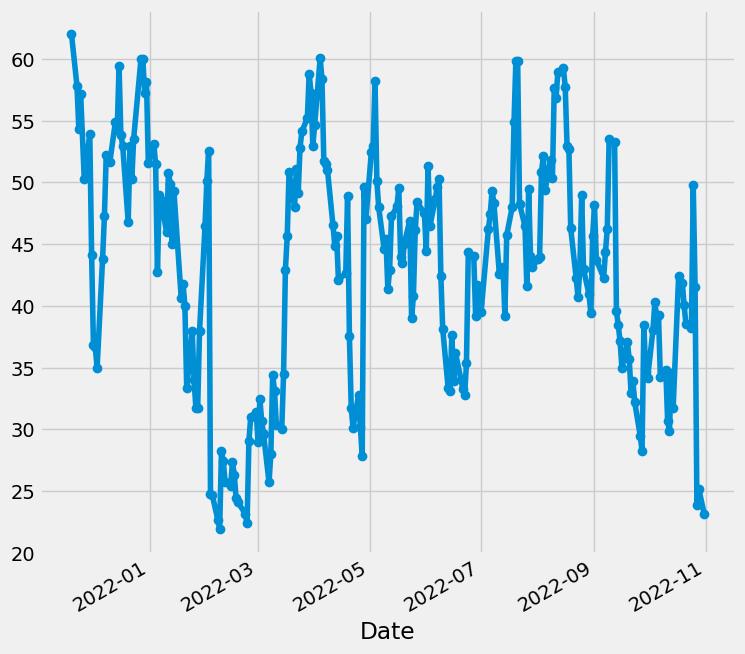

In [33]:
df['RSI'] = ta.RSI(df['Close'],14)
df['RSI'].plot(figsize=(8,8),marker='o')
df.tail(10)

In [35]:
rsi = ta.RSI(df["Close"], timeperiod=14)
print("RSI (first 10 elements)\n", rsi[14:24])

RSI (first 10 elements)
 Date
2021-11-19 00:00:00-05:00    61.998729
2021-11-22 00:00:00-05:00    57.814786
2021-11-23 00:00:00-05:00    54.352663
2021-11-24 00:00:00-05:00    57.152601
2021-11-26 00:00:00-05:00    50.236897
2021-11-29 00:00:00-05:00    53.947935
2021-11-30 00:00:00-05:00    44.148763
2021-12-01 00:00:00-05:00    36.796959
2021-12-02 00:00:00-05:00    36.697251
2021-12-03 00:00:00-05:00    34.971991
dtype: float64


In [36]:

def bbp(price):
    up, mid, low = ta.BBANDS(df["close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bbp = (price['AdjClose'] - low) / (up - low)
    return bbp

In [ ]:
holdings = pd.DataFrame(index=price.index, data={'Holdings': np.array([np.nan] * index.shape[0])})
holdings.loc[((price['RSI'] < 30) & (price['BBP'] < 0)), 'Holdings'] = max_holding
holdings.loc[((price['RSI'] > 70) & (price['BBP'] > 1)), 'Holdings'] = 0
holdings.ffill(inplace=True)
holdings.fillna(0, inplace=True)

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
ax0.plot(index, price['AdjClose'], label='AdjClose')
ax0.set_xlabel('Date')
ax0.set_ylabel('AdjClose')
ax0.grid()
for day, holding in holdings.iterrows():
    order = holding['Order']
    if order > 0:
        ax0.scatter(x=day, y=price.loc[day, 'AdjClose'], color='green')
    elif order < 0:
        ax0.scatter(x=day, y=price.loc[day, 'AdjClose'], color='red')

ax1.plot(index, price['RSI'], label='RSI')
ax1.fill_between(index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

ax2.plot(index, price['BB_up'], label='BB_up')
ax2.plot(index, price['AdjClose'], label='AdjClose')
ax2.plot(index, price['BB_low'], label='BB_low')
ax2.fill_between(index, y1=price['BB_low'], y2=price['BB_up'], color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()

fig.tight_layout()
plt.show()